A little context:

This (smol) project came out of [Grant's video on Ordinary Differential equations](https://www.youtube.com/watch?v=p_di4Zn4wz4&list=PLZHQObOWTQDNPOjrT6KVlfJuKtYTftqH6&index=1&t=1261s). In this video he goes over several things about differential equations in general and one of the ideas he talks about is that of plotting a phase space in order to see the behaviour of a differential equation for different initial conditions. This is important because, differential equations can be sensitive to initial conditions and their behaviour can be very different with different initial conditions. The example Grant used was that of a realistic pendulum (one subject to both air resistance and moving at angles large enough for the small angle approximation to not apply. We can see many interesting properties about this system by plotting the values of the angle theta along with the angular velocity of the system. This is called a phase space diagram of the system. In the talk I'll first show you the phase space and talk about it for a bit.

A little observation about learning to program (If you are reading this right after context, don't. **Go see the plot first. Scroll down. Fun stuff first**): 

Syntax is boring, for loops are not very fun by themselves. Programming (at least when you are starting out, ig) is not very fun on it's own. It's always much more fun to code if you're using it to solve a problem you wanna solve (or plot a pretty curve!)There are many fun problems out there, find ones that you vibe with, ask friends, ask seniors and then start trying to solve them (if you can't solve them, ask for help and use google a lot). If you do this, programming will be super fun!

P.S: The bob is connected to a rod, not a string. I have hard coded the values for air resistance dissipation and I've used the simplest form of the equation. One can very easily make this more general by wrapping things in a function and passing mass and air resistance coeff as parameters, but that's not what is important here


**Step 0**: (yes programmers count from 0, they're weird. At least they don't announce a first law, realise they missed something and declare a zeroth law):

How in the world am I supposed to do this, this is scary, so much is happening. AAAAAA

**Step 1**: Ok, now that the tantrum is over, lets calm down...

First things first, lets figure out how to solve the differential equation(Grant explains this a bit in his differential equations video)

If the differential equation is given as $\frac{d^2y}{dx^2} = f(x)$

Take $\frac{dy}{dx}$ = $v$

Which converts the equation into 
$\frac{dv}{dx} = f(x)$ hence giving us two coupled first degree equations.

These can be solved as follows. We take a small time interval $\Delta t$ and calculate the change in angle $\Delta \theta = \omega \Delta t$ for this small interval. 
Then, in the same step we calculate the change in angular velocity for this interval $\Delta \omega = \alpha \Delta t$ and add that to it too!

$\alpha$ here comes from the second differential equation!

For a small enough $\Delta t$, this will give us a numerical solution for the differential equation


Also, we need $\pi$. How do you get $\pi$? I googled and apparently this thing called numpy has it

(I love how furious my school math teachers would be at the idea of solving the differential equation in this most obvious way)

Literally all we have to do is update each value according to the diffeq for a small enough change in time, how amazing is that. (No more dumb substitutions!)

In the lingo, a change in time is called a **timestep** (you find an appropriate timestep by tweaking the timestep until it works)

Yes, yes this is not state of the art when it comes to numerically solving diffeqs, but it's fun and simple and much better at it than you initially expect!

In [ ]:
import numpy as np
theta=(np.pi/2) #What is a large angle?Idk, but 90 degrees is definitely large
w=0
dt=0.01
for t in range (12000):
  #We define change functions to compute the change for a given time step and then update the functions themselves by adding the change function to them
  dTheta=w*dt 
  theta=theta+dTheta
  dw=-(0.05*w*dt)- (np.sin(theta))*dt*0.06
  w=w+dw  
  #print(theta)#This is a horrible idea, don't do this xD, we need to find a way to output our data like Grant did

#well, that wasn't so hard, was it?

**Step 2:**

How does one plot this? I had absolutely no idea, so I googled it. Apparently there's something called matplotlib for this

To plot, first you have to store the values corresponding to timesteps in a list and then, use **plt.plot(x coord, ycoord)** followed by **plt.show()**. 

There probably were commands to do stuff like label my axes and what not, but I'm super lazy.

P.S: Fuck indentation errors


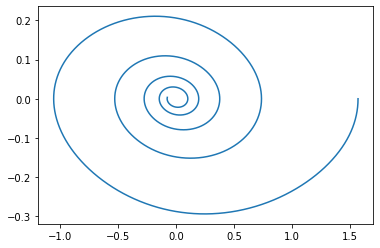

In [ ]:
#Note: x is just theta
import matplotlib.pyplot as plt
import numpy as np
 
x= (np.pi/2) 
w=0
t=0
#We define empty lists in which we will later append data for each timestep
X_s=[]
W_s=[]
dt=0.01
T_s=[]
for t in range (12000):
  X_s.append(x)
  W_s.append(w)
  T_s.append(t*dt)
  dx=w*dt
  x=x+dx
  dw=-(0.05*w*dt)- (np.sin(x))*dt*0.06
  w=w+dw
plt.plot(X_s, W_s)
plt.show()

But I don't want just 1 plot, I want many!

Well, we already know how to make a computer do something again and again, don't we?

We'll use a for loop to have the initial angle step through different initial values and plot them just like we did before.


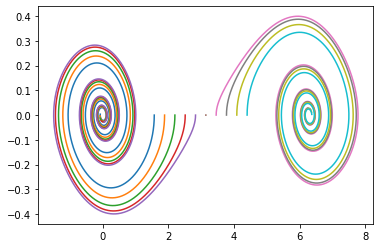

In [ ]:
import matplotlib.pyplot as plt
import numpy as np
 
for s in range(10):
  x=(np.pi*s)/10 +(np.pi/2) #now for each iteration we will have a different initial angle
  w=0
  t=0
  X_s=[]
  W_s=[]
  dt=0.01
  T_s=[]
  for t in range (12000):
    X_s.append(x)
    W_s.append(w)
    T_s.append(t*dt)
    dx=w*dt
    x=x+dx
    dw=-(0.05*w*dt)- (np.sin(x))*dt*0.06
    w=w+dw
  plt.plot(X_s, W_s)
plt.show()

But this isn't quite what Grant had plotted. I was initially confused as to what was different.

Turns out, Grant had been varying both initial angle and angular velocity. so lets have the angular velocity depend on the iteration too.


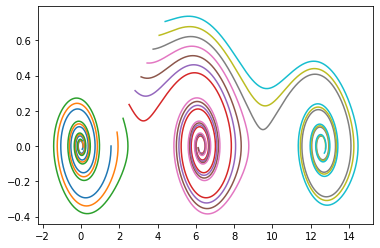

In [ ]:
import matplotlib.pyplot as plt
import numpy as np

for s in range(10):
  x=(np.pi*s)/10 + (np.pi/2)
  w=0.1*(np.pi*s)/4 #Now angular velocity varies with each iteration too!
  X_s=[]
  W_s=[]
  T_s=[]
  dt=0.01
  
  for t in range (11000):
    X_s.append(x)
    W_s.append(w)
    T_s.append(t*dt)
    dx=w*dt
    x=x+dx
    dw=-(0.05*w*dt)- (np.sin(x))*dt*0.06
    w=w+dw
  plt.plot(X_s, W_s)
plt.show() 
#Pretty plot!Makes me so happy!